In [68]:
import pandas as pd
import database as db
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import pony.orm as porm

In [4]:
db.set_up_connection(db.db, 'db_weather', user = 'webscrapers')


postgres user password: ········


In [5]:
query = db.DailyMeasurement.select(lambda m: 'Berlin' in m.station.stationsname 
                                   and m.mess_datum == datetime.date(2018,5,1)).get_sql()

In [6]:
berlin_may1_2018 = pd.read_sql(query, db.conn_url)

In [12]:
query = db.DailyMeasurement.select(lambda m: 'Frankfurt' in m.station.stationsname and 
                                   m.mess_datum >= datetime.date(2018,2,1) and m.mess_datum < datetime.date(2018,5,1)).get_sql()

In [13]:
frankfurt_feb_may2018 = pd.read_sql(query, db.conn_url)

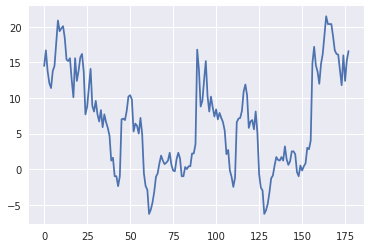

In [14]:
#plotting maximum temperature from feb to may 2018
plt.plot(frankfurt_feb_may2018['tmk']) # but we might want to plot an average of different stations 

In [18]:
# plotting max temperature by taking average over station ids
frankfurt_feb_may2018[['mess_datum', 'station', 'tmk']]

,mess_datum,station,tmk
0,2018-04-30,1420,14.5
1,2018-04-29,1420,16.7
2,2018-04-28,1420,13.8
3,2018-04-27,1420,12.1
4,2018-04-26,1420,11.4
5,2018-04-25,1420,13.8
6,2018-04-24,1420,14.5
7,2018-04-23,1420,17.8
8,2018-04-22,1420,20.9
9,2018-04-21,1420,19.4


In [16]:
frankfurt_feb_may2018[['mess_datum','station']]

In [11]:
frankfurt_feb_may2018.loc[frankfurt_feb_may2018['mess_datum']==datetime.date(2018,3,9)]

,mess_datum,stations_id,station,qn_3,fx,fm,qn_4,rsk,rskf,sdk,shk_tag,nm,vpm,pm,tmk,upm,txk,tnk,tgk
52,2018-03-09,1420,1420,3.0,8.2,2.1,3,9.5,6.0,0.0,0.0,7.3,8.2,996.04,5.3,91.17,8.5,1.1,-1.1
118,2018-03-09,1424,1424,NaN,NaN,NaN,3,6.3,4.0,NaN,NaN,NaN,8.6,NaN,5.8,91.83,8.0,2.9,0.8


In [37]:
means_ondates = frankfurt_feb_may2018.groupby(['mess_datum']).mean()

In [44]:
type(frankfurt_feb_may2018.mess_datum[0])

datetime.date

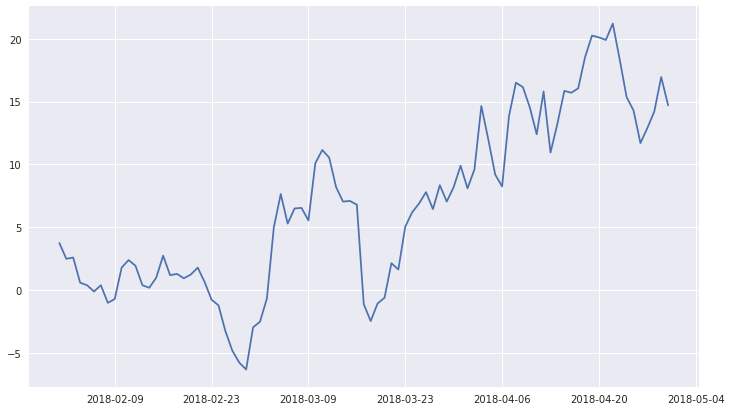

In [101]:
plt.figure(figsize = (12,7))
plt.plot(means_ondates['tmk']);


In [98]:
from datetime import datetime, timedelta
from collections import OrderedDict


#MONTHS = {'01':'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr', '05': 'May', '06': 'Jun', 
#          '07': 'Jul', '08': 'Aug', '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'}

def labels_month_year(dates):
    start, end = [datetime.datetime.strptime(_, "%Y-%m-%d") for _ in dates]
    labels = OrderedDict(((start + timedelta(_)).strftime(r"%b-%y"), None) for _ in range((end - start).days)).keys()

    return labels



In [99]:
import datetime
from collections import OrderedDict

dates = [datetime.date(2018,2,1).isoformat(), datetime.date(2018,5,1).isoformat()]
l= labels_month_year(dates)


In [94]:
start, end = [datetime.datetime.strptime(_, "%Y-%m-%d") for _ in dates]
labels = OrderedDict(((start + timedelta(_)).strftime(r"%b-%y"), None) for _ in range((end - start).days)).keys()
labels

odict_keys(['Feb-18', 'Mar-18', 'Apr-18'])